In [1]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import pickle
from scipy import stats

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [676]:
with open('../data/1222-1327/results.pkl', 'rb') as f:
    smc = pickle.load(f)
    
with open('../data/1221-1513/results.pkl', 'rb') as f:
    post = pickle.load(f)
    
with open('../data/1221-1923/results.pkl', 'rb') as f:
    pre = pickle.load(f)

In [658]:
with open('../data/1220-1355_smc_samples/results.pkl', 'rb') as f:
    smcadd = pickle.load(f)

In [659]:
smc.shape

(1, 1, 70, 1)

In [660]:
post.shape

(1, 1, 70, 1)

In [661]:
pre.shape

(1, 1, 105, 1)

In [662]:
# s1 is number of times ran, s2 is length of sample runs

def mean_sd(data, s1, s2):
    data = [d[0] for d in data]
    
    mu = [d.mean() for d in data]
    mu = np.asarray(mu)
    mu = mu.reshape(s1,s2)
    
    sd = [d.std() for d in data]
    sd = np.asarray(sd)
    sd = sd.reshape(s1,s2)
    
    return mu, sd

In [680]:
smc_mu, smc_sd = mean_sd(smc[0,0,:,0], 15, 7)
post_mu, post_sd = mean_sd(post[0,0,:,0], 10, 7)
pre_mu, pre_sd = mean_sd(pre[0,0,:,0], 10, 7)

In [681]:
pre_sd

array([[0.90900207, 0.94621795, 0.9186489 , 0.97203887, 0.9658896 ,
        0.9088439 , 0.8852353 ],
       [0.9677086 , 1.0033495 , 0.8383404 , 0.8994087 , 0.97924966,
        0.8550049 , 0.8356726 ],
       [0.7777852 , 0.9122105 , 0.7845068 , 0.9410997 , 0.99024856,
        0.9483834 , 0.9149424 ],
       [0.9363534 , 0.80925256, 0.86658365, 0.82223535, 0.83916885,
        0.9181353 , 0.86506754],
       [1.1522324 , 1.0512127 , 0.8857569 , 0.9072208 , 0.8856925 ,
        0.8389075 , 0.8949226 ],
       [0.90405387, 0.91016424, 0.9661443 , 0.9088212 , 0.90710926,
        0.904087  , 0.93458915],
       [1.03669   , 0.74286246, 0.9239066 , 0.8977985 , 0.94218516,
        0.92532307, 0.8977547 ],
       [1.009454  , 0.73540735, 0.9929974 , 0.87692297, 0.9115654 ,
        0.9149778 , 0.89406234],
       [0.9881432 , 0.8084793 , 0.94791585, 0.8797173 , 0.7593886 ,
        0.88783014, 0.9543576 ],
       [0.82649463, 0.81723315, 0.9001317 , 0.8512166 , 0.8525069 ,
        0.93504864, 0.8

In [682]:
def plot_box(smc, post, pre, truth = 7.25, lab = "Mean"):
    p1 = smc
    p2 = post
    p3 = pre

    ticks = range(1, (len(p1)+1))
#     ticks = [str(tick) for tick in ticks]
    ticks = ['2s', '5s', '7s', '11s', '16s', '21s', '28s']


    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    plt.figure()

    bpl = plt.boxplot(p1, whis= 2, positions=np.array(range(7))*3.0-0.6, widths=0.6)
    bpr = plt.boxplot(p3, whis= 2, positions=np.array(range(7))*3.0+0.6, widths=0.6)
    bpm = plt.boxplot(p2, whis= 2, positions=np.array(range(7))*3.0, widths=0.6)


    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')
    set_box_color(bpm, '#2ca25f')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='SMC')
    plt.plot([], c='#2ca25f', label='Post-rejuvenation SMC')
    plt.plot([], c='#2C7BB6', label='Pre-rejuvenation SMC')
    plt.legend()

    plt.xticks(range(0, len(ticks) * 3, 3), ticks)
    plt.xlim(-2, 20)
    plt.xlabel("Running time")
    plt.ylabel(lab)
    xmin, xmax = plt.xlim()
    plt.hlines(truth, xmin, xmax, color="black", alpha=0.2)
    return plt


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

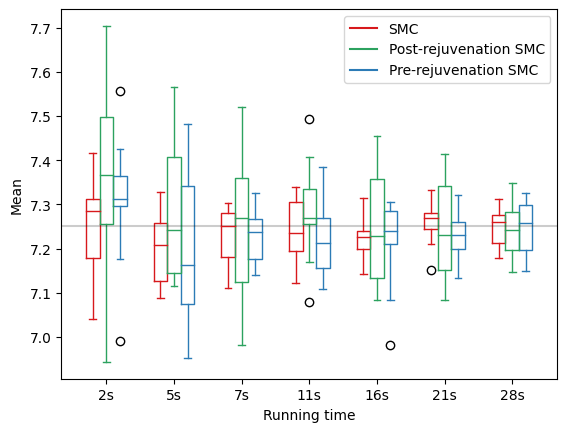

In [683]:
plot_box(smc_mu, post_mu, pre_mu, truth=7.25, lab = "Mean")

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

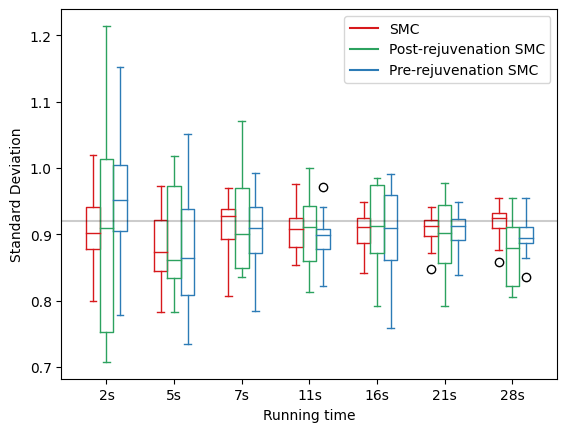

In [684]:
plot_box(smc_sd, post_sd, pre_sd, truth=0.92, lab = "Standard Deviation")

In [685]:
p1 = cal_mean(smc_mu)
p2 = cal_mean(post_mu)
p3 = cal_mean(pre_mu)

In [686]:
ticks = ['5s', '7s', '11s', '16s', '21s', '28s', '34s']

Text(0.5, 1.0, 'MSE of Mean')

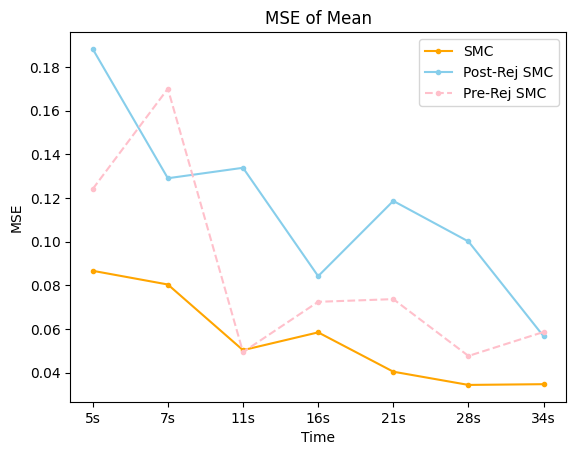

In [687]:
plt.plot(p1, color="orange", label= "SMC", marker=".")
plt.plot(p2, color="skyblue", label = "Post-Rej SMC", marker=".")
plt.plot(p3, color="pink", label = "Pre-Rej SMC", marker=".", linestyle="--")
plt.xticks(range(0, len(ticks), 1), ticks)
plt.legend(loc="upper right")
plt.ylabel("MSE")
plt.xlabel("Time")
plt.title("MSE of Mean")

In [688]:
p4 = cal_sd(smc_sd)
p5 = cal_sd(post_sd)
p6 = cal_sd(pre_sd)

In [689]:
p4

tensor([0.0474, 0.0536, 0.0338, 0.0293, 0.0248, 0.0192, 0.0189])

Text(0.5, 1.0, 'MSE of Standard Deviation')

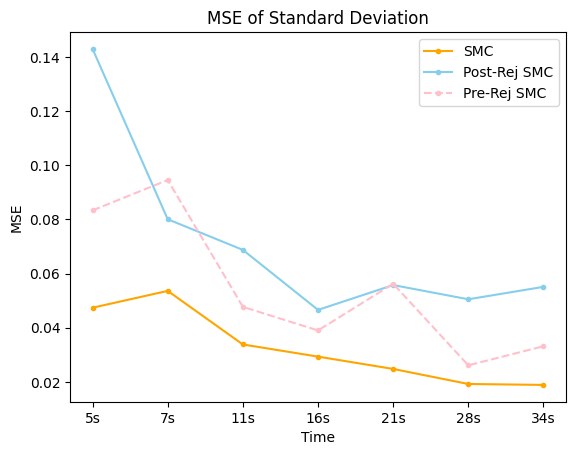

In [690]:
plt.plot(p4, color = "orange", label= "SMC", marker=".")
plt.plot(p5, color="skyblue", label = "Post-Rej SMC", marker = ".")
plt.xticks(range(0, len(ticks), 1), ticks)
plt.plot(p6, color="pink", label = "Pre-Rej SMC", marker = ".", linestyle="--")
plt.legend(loc="upper right")
plt.ylabel("MSE")
plt.xlabel("Time")
plt.title("MSE of Standard Deviation")

In [554]:
def cal_mean(mean):
    mean = tc.tensor(mean)
    mean = tc.t(mean)
    mean = mean.apply_(lambda x: tc.sqrt(tc.tensor((x-7.25)**2)))
    mean_result = mean.mean(axis=1)
    return mean_result

In [566]:
def cal_sd(sd):
    sd = tc.tensor(sd)
    sd = tc.t(sd)
    sd = sd.apply_(lambda x: tc.sqrt(tc.tensor((x-0.92)**2)))
    sd_result = sd.mean(axis=1)
    return sd_result

In [490]:
with open('../data/1220-2246/results.pkl', 'rb') as f:
    rej_post = pickle.load(f)

In [491]:
post_rej_mean, post_rej_sd = mean_sd(rej_post[0,0,0,:], 10, 9)

In [492]:
def plot_rej(mean, sd):
    mean = tc.tensor(mean)
    mean = tc.t(mean)
    mean = mean.apply_(lambda x: tc.sqrt(tc.tensor((x-7.25)**2)))
    mean_result = mean.mean(axis=1)
    
    sd = tc.tensor(sd)
    sd = tc.t(sd)
    sd = sd.apply_(lambda x: tc.sqrt(tc.tensor((x-0.92)**2)))
    sd_result = sd.mean(axis=1)
    
    return mean_result, sd_result

In [493]:
r_mean, r_sd = plot_rej(post_rej_mean, post_rej_sd)

([<matplotlib.axis.XTick at 0x28e04fca0>,
 [Text(0, 0, '1'),
  Text(1, 0, '15'),
  Text(2, 0, '30'),
  Text(3, 0, '45'),
  Text(4, 0, '60'),
  Text(5, 0, '75'),
  Text(6, 0, '90'),
  Text(7, 0, '105'),
  Text(8, 0, '130')])

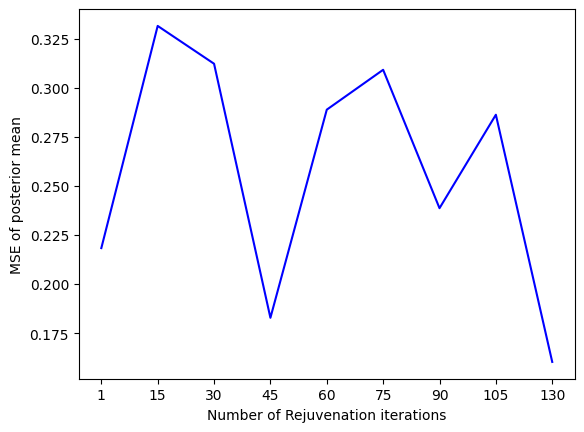

In [496]:
plt.plot(r_mean, color="blue")
plt.xlabel("Number of Rejuvenation iterations")
plt.ylabel("MSE of posterior mean")
plt.xticks(np.arange(9), ['1', '15', '30', '45', '60', '75', '90', '105', '130'])

([<matplotlib.axis.XTick at 0x28f3bb970>,
 [Text(0, 0, '1'),
  Text(1, 0, '15'),
  Text(2, 0, '30'),
  Text(3, 0, '45'),
  Text(4, 0, '60'),
  Text(5, 0, '75'),
  Text(6, 0, '90'),
  Text(7, 0, '105'),
  Text(8, 0, '130')])

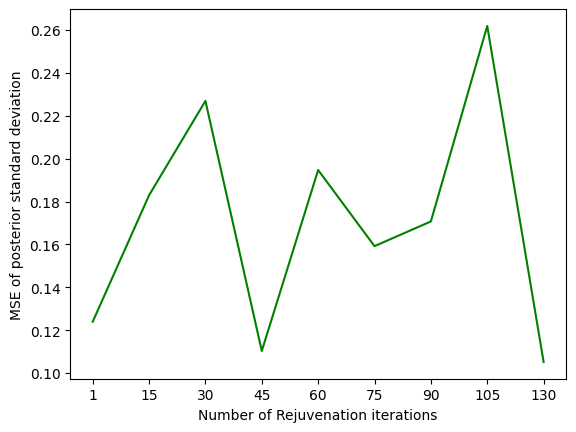

In [495]:
plt.plot(r_sd, color="green")
plt.xlabel("Number of Rejuvenation iterations")
plt.ylabel("MSE of posterior standard deviation")
plt.xticks(np.arange(9), ['1', '15', '30', '45', '60', '75', '90', '105', '130'])

In [217]:
post_rej_mean = tc.tensor(post_rej_mean)

In [218]:
post_rej_mean = tc.t(post_rej_mean)

In [219]:
result = post_rej_mean.apply_(lambda x: tc.sqrt(tc.tensor((x-7.25)**2)))

In [220]:
result

tensor([[0.0412, 0.1416, 0.0989, 0.0430, 0.0465, 0.0079, 0.0878, 0.1768, 0.1347,
         0.1516],
        [0.3170, 0.0715, 0.1947, 0.1918, 0.0810, 0.3653, 0.1109, 0.0033, 0.1838,
         0.1045],
        [0.4532, 0.1143, 0.0588, 0.0047, 0.0219, 0.2890, 0.0122, 0.1771, 0.0403,
         0.0450],
        [0.1124, 0.0305, 0.2312, 0.2511, 0.0039, 0.0733, 0.0807, 0.1626, 0.0883,
         0.0403],
        [0.2004, 0.0418, 0.0169, 0.0350, 0.1119, 0.1160, 0.0298, 0.1279, 0.1670,
         0.0788],
        [0.1898, 0.2529, 0.0540, 0.1880, 0.0579, 0.1746, 0.1014, 0.2727, 0.0070,
         0.0568],
        [0.1069, 0.1212, 0.0853, 0.2345, 0.1009, 0.1116, 0.1224, 0.1018, 0.0717,
         0.0008],
        [0.0675, 0.1236, 0.0361, 0.2754, 0.0032, 0.0763, 0.1304, 0.2660, 0.2343,
         0.1576],
        [0.2354, 0.1122, 0.1660, 0.1949, 0.0039, 0.1240, 0.0575, 0.0279, 0.2459,
         0.1300]])

In [221]:
result = result.mean(axis=1)

In [222]:
result

tensor([0.0930, 0.1624, 0.1217, 0.1074, 0.0926, 0.1355, 0.1057, 0.1371, 0.1298])

In [223]:
result.shape

torch.Size([9])

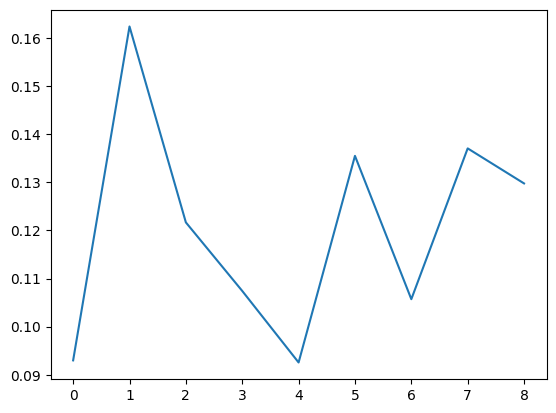

In [224]:
plt.plot(result)